In [10]:
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

In [2]:
# choose path for your dataset
path_data = "../../dataset/"

In [3]:
df_train = pd.read_csv(path_data + 'train.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
crew          int64
experiment    object
time          float64
seat          int64
eeg_fp1       float64
eeg_f7        float64
eeg_f8        float64
eeg_t4        float64
eeg_t6        float64
eeg_t5        float64
eeg_t3        float64
eeg_fp2       float64
eeg_o1        float64
eeg_p3        float64
eeg_pz        float64
eeg_f3        float64
eeg_fz        float64
eeg_f4        float64
eeg_c4        float64
eeg_p4        float64
eeg_poz       float64
eeg_c3        float64
eeg_cz        float64
eeg_o2        float64
ecg           float64
r             float64
gsr           float64
event         object
dtypes: float64(24), int64(2), object(2)
memory usage: 1.0+ GB


In [23]:
subset = df_train.loc[(df_train['crew'] == 1) & (df_train['experiment'] == 'CA') & (df_train['seat'] == 0) ]
subset.sort_values(by='time')

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
44,1,CA,0.183594,0,1.993100,8.099320,8.899960,-11.851900,0.637441,-5.892530,...,8.653200,8.279090,0.513576,5.808680,13.160400,-1.820250,-18260.80078,665.002014,823.356018,A
46,1,CA,0.187500,0,1.442160,7.208550,6.153520,-18.372601,7.036370,-2.301950,...,19.512100,11.107300,0.144438,5.423330,14.282600,-0.210154,-18260.80078,665.002014,823.356018,A
48,1,CA,0.191406,0,1.881800,1.906450,-7.297140,0.054378,9.325300,-10.387200,...,3.498120,-0.929733,-8.453040,-0.570990,4.080620,-8.399230,-18260.80078,665.002014,823.356018,A
50,1,CA,0.195312,0,3.100600,0.000000,8.118780,10.091100,4.783260,-14.553400,...,-5.505160,-4.917930,-10.377900,-0.696449,2.998400,-11.997400,-18260.80078,665.002014,823.356018,A
52,1,CA,0.199219,0,0.000000,-0.260347,5.007830,10.015900,-1.802200,-7.049790,...,-1.161440,-1.529110,-7.383270,-0.912276,3.564840,-9.385510,-18260.80078,665.002014,823.356018,A
54,1,CA,0.203125,0,4.396930,4.736580,6.708780,8.353320,5.495950,-7.313860,...,1.844110,2.267170,-2.999070,2.626710,4.694760,-4.903500,-18260.80078,665.002014,823.356018,A
56,1,CA,0.207031,0,6.711250,9.491620,15.189200,7.776070,5.849400,-5.769200,...,5.719780,5.970900,-0.158241,6.515400,6.501890,-1.093660,-18260.80078,665.002014,823.356018,A
58,1,CA,0.210938,0,3.109110,5.538730,17.328199,5.069790,5.531580,0.724080,...,12.458800,7.606200,-1.444510,4.463930,6.792020,0.682369,-18260.80078,665.002014,823.356018,A
60,1,CA,0.214844,0,-3.170320,0.000000,0.808147,3.652660,1.174990,-1.838420,...,7.191010,1.659600,-7.493740,-2.286660,1.699460,-5.134870,-18261.69922,665.091003,823.414978,A
62,1,CA,0.218750,0,-7.894010,-1.105210,-2.453760,5.965590,-2.353010,-4.511560,...,9.212450,0.144593,-8.902160,-4.798350,2.231780,-9.776810,-18261.69922,665.091003,823.414978,A


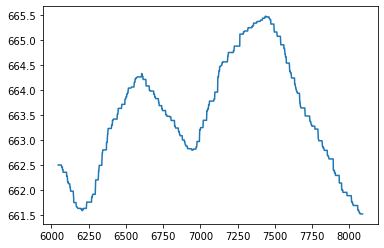

In [24]:
plt.plot(subset['r'][3000:4024])

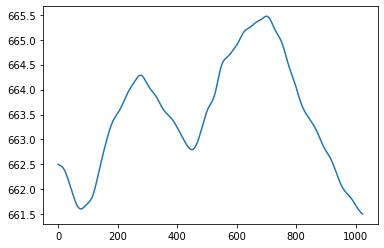

In [25]:
b, a = signal.butter(8,0.05)

y = signal.filtfilt(b, a, subset['r'], padlen=150)

plt.plot(y[3000:4024])

In [32]:
def data_state_subplot(data_train,crew, seat):
    print('Plots for ecg, r, and gsr readings.')
    print('Orange denotes an event( SS, CA, DA) & blue denotes baseline cognitive state.')
    fig, ax = plt.subplots(3, 3,figsize=(20,20), sharex='col', sharey='row')
    
        
    for j, y in enumerate(['CA','DA','SS']):
        for i, x in enumerate(['ecg','r','gsr']):
            
            
            example = data_train.loc[(data_train.crew==crew)&(data_train.experiment==y)&(data_train.seat==seat)].sort_values(by='time').reset_index()
            ax[i,j].scatter(x=example.loc[example.event=='A'].time, y=example.loc[example.event=='A'][x], s=0.5)
            ax[i,j].set_xlabel('Time')
            ax[i,j].set_ylabel(x)
            ax[i,j].set_title(y)
            if y == 'CA':
                ax[i,j].scatter(x=example.loc[example.event=='C'].time, y=example.loc[example.event=='C'][x], s=0.5)
            elif y == 'DA':
                ax[i,j].scatter(x=example.loc[example.event=='D'].time, y=example.loc[example.event=='D'][x], s=0.5)
            elif y == 'SS':
                ax[i,j].scatter(x=example.loc[example.event=='B'].time, y=example.loc[example.event=='B'][x], s=0.5)
    fig.suptitle('Crew: {}, Seat: {}'.format(crew, seat), fontsize=16)
    plt.show()

Plots for ecg, r, and gsr readings.
Orange denotes an event( SS, CA, DA) & blue denotes baseline cognitive state.


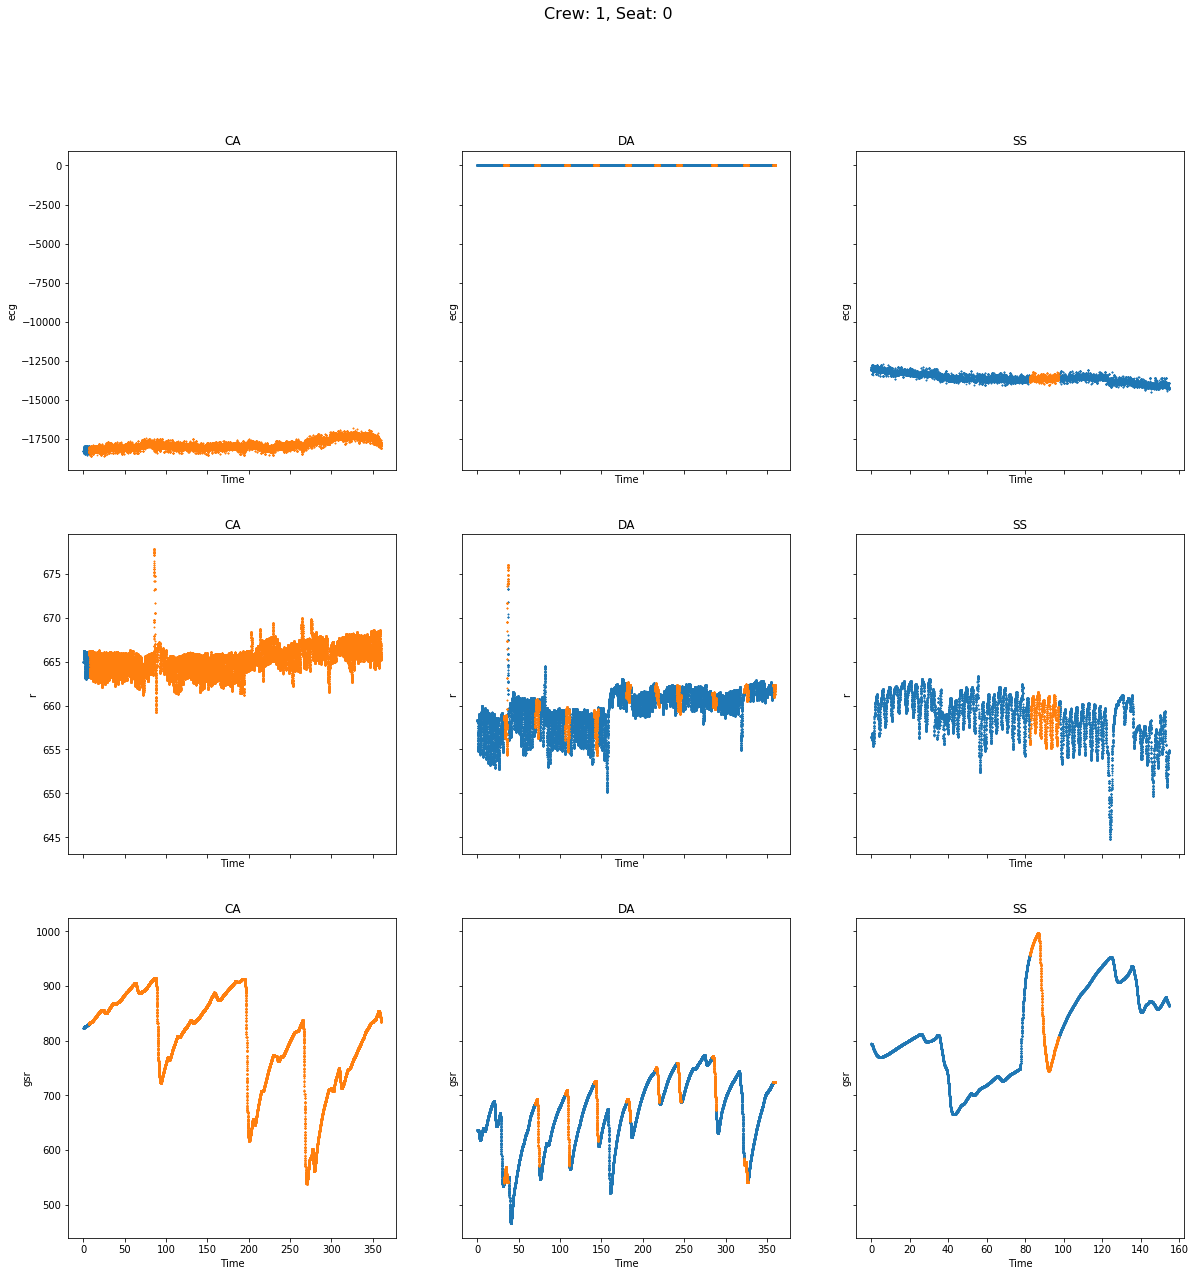

In [33]:
# Plot with raw data, no signal processing
data_state_subplot(df_train,1,0)